<a href="https://colab.research.google.com/github/NoeliaFerrero/CODERHOUSE_DataScience_32765/blob/main/Afterclass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
mpl.rc('axes', labelsize=16, titlesize=16) #aumentar tamaño de las etiquetas en ejes

# Repasemos como podemos analizar un dataframe: utilicemos como ejemplo nuestro dataset del titanic

**Descripción del dataframe:** 

**Indice filas**: PassengerId -->id_pasajero

**Columnas:**
* Survived: sobreviviente? 1=Persona sobrevivió, 0= Persona falleció
* Pclass: clase pasajero (Primera, segunda o tercera clase - 1,2,3)
* Name: nombre pasajero
* Sex: male=masculino, female=femenino
* Age: edad
* SibSp: número de hermanos y esposos a bordo
* Parch: número de padres e hijos abordo
* Ticket: numero ticket
* Fare: precio pasaje
* Cabin: cabina
* Embarked : puerto de embarque. C = Cherbourg; Q = Queenstown; S = Southampton

In [ ]:
#IMPORTANDO NUESTRO DATAFRAME

df_titanic = pd.read_csv('https://raw.githubusercontent.com/NotAyushXD/Titanic-dataset/master/train.csv',
                         index_col=0 ) # con index_col=0 le estamos diciendo que la primera columna es nuestro indice
df_titanic

df_titanic.head(5) #cuando tenemos dataframes grandes esta funcion dataframe.head() nos permite ver cierto numero de filas del inicio, en este caso 5

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_titanic.shape #891 filas, 11 columnas

(891, 11)

In [ ]:
#que tipos tiene el dataframe
df_titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
# PREGUNTA CLASE: ESTAMOS CAMBIANDO EL TIPO DE DOS COLUMNAS, POR QUÉ CREEN QUE HAGO ESTO?

df_titanic['Survived']=df_titanic.Survived.astype(object)
df_titanic['Pclass']=df_titanic.Pclass.astype(object)

In [ ]:
df_titanic.dtypes

Survived     object
Pclass       object
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
# cuantos valores nulos tiene el dataframe en cada columna
df_titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Como puedo ver el comportamiento de mis variables categoricas (no numericas)? Con gráficas!

**Gráfico 1**

In [ ]:
sobrevivientes= pd.Series(df_titanic.groupby('Survived').size())
sobrevivientes

Survived
0    549
1    342
dtype: int64

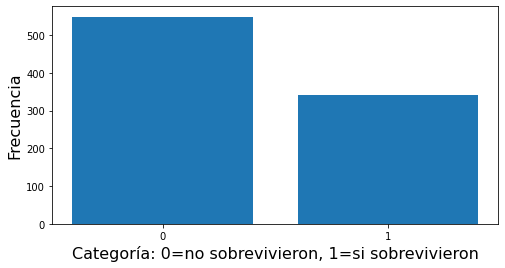

In [ ]:
fig, ax = plt.subplots(figsize=(8,4)) # figsize: (ancho,alto) en pulgadas 
ax.bar(sobrevivientes.index, sobrevivientes.values)

ax.set_ylabel('Frecuencia')
ax.set_xlabel('Categoría: 0=no sobrevivieron, 1=si sobrevivieron')

plt.xticks(np.arange(0, 2, step=1)) #para que me muestre eje x mas claro
plt.show()

In [ ]:
#np.arange(0, 2, step=1)

**Gráfico 2**

In [ ]:
genero= pd.Series(df_titanic.groupby('Sex').size())
genero

Sex
female    314
male      577
dtype: int64

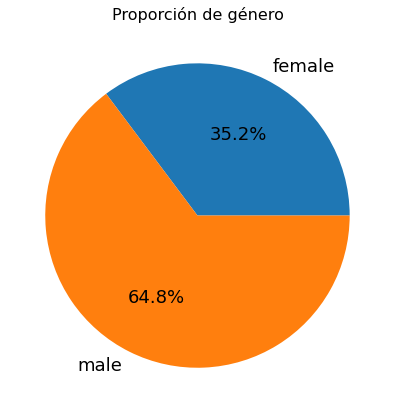

In [ ]:
fig,ax = plt.subplots(figsize =(10, 7))

ax.pie(genero, 
       labels = genero.index,
       autopct='%1.1f%%', #para mostrar proporcion dentro de grafico
       textprops={'fontsize': 18}) #para aumentar tamaño de fuente

ax.set_title('Proporción de género')
plt.show() 

**Gráfico 3**

In [ ]:
# clase_tiquete=pd.DataFrame(df_titanic.groupby(['Pclass','Sex']).size()).reset_index()

# clase_tiquete.rename(columns={0:'conteo'},inplace=True)

In [ ]:
clase_tiquete= pd.DataFrame(df_titanic.groupby(['Pclass','Sex']).size()).reset_index() #reset_index me ayuda a convertir los indices en columnas
clase_tiquete.rename(columns={0:'conteo'},inplace=True) #le cambio el nombre a una columna que habia quedado como 0 
clase_tiquete

,Pclass,Sex,conteo
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


In [ ]:
clase_tiquete.loc[clase_tiquete['Sex']=='female','conteo']

0     94
2     76
4    144
Name: conteo, dtype: int64

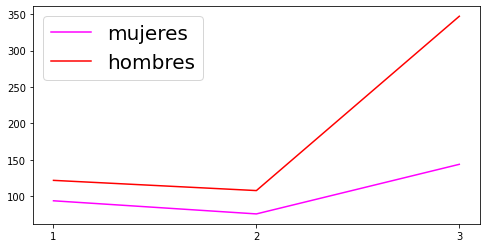

In [ ]:
fig, ax = plt.subplots(figsize=(8,4)) # figsize: (ancho,alto) en pulgadas 

ax.plot(clase_tiquete.loc[clase_tiquete['Sex']=='female','Pclass'], 
        clase_tiquete.loc[clase_tiquete['Sex']=='female','conteo'], 
        label='mujeres',color='magenta')

ax.plot(clase_tiquete.loc[clase_tiquete['Sex']=='male','Pclass'], 
        clase_tiquete.loc[clase_tiquete['Sex']=='male','conteo'], 
        label='hombres', color='red')

ax.legend() #mostrando mi cajita de etiquetas para cada linea

plt.xticks(np.arange(1, 4, step=1)) #para que me muestre eje x mas claro
plt.show()

# Qué opciones básicas tengo para lidiar con valores nulos o faltantes?

In [ ]:
# cuantos valores nulos tiene el dataframe en cada columna
df_titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True) 

In [ ]:
df_titanic['Cabin'].fillna('valor_desconocido', inplace=True)

In [ ]:
df_titanic['Embarked'].fillna('valor_desconocido', inplace=True)

In [ ]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Cómo puedo ver comportamiento de variables numéricas, sin utilizar gráficas? Con el método .describe( )

**Para cada columna numerica vamos a tener lo siguiente:**

* **count**: conteo de la cantidad de filas. Noten como el número se repite en cada columna.
* **mean**: promedio para cada columna.
* **std**: desviacion estandar. Nos dice que tan dispersos están los datos en relación a la media.
* **min**: valor minimo de toda la columna. 
* **25%**: percentil 25.
* **50%**: percentil 50 o MEDIANA.
* **75%**: percentil 75.
* **max**: valor maximo de toda la columna. 

In [ ]:
# resumen estadistico de variables numericas
df_titanic.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


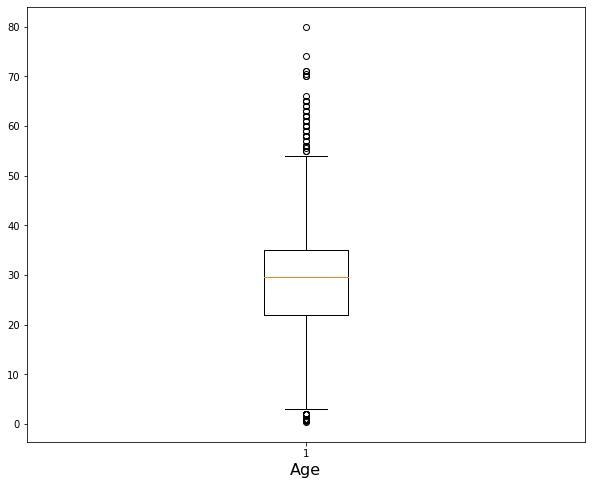

In [ ]:
#DIAGRAMA DE CAJA Y BIGOTES para una variable...comparemos con método .describe()

fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot(df_titanic['Age']) #debimos transponer el dataframe porque queremos a los meses en el eje X

ax.set_xlabel('Age')
plt.show()

# Relaciones entre variables numéricas con gráficos de puntos o scatter plots

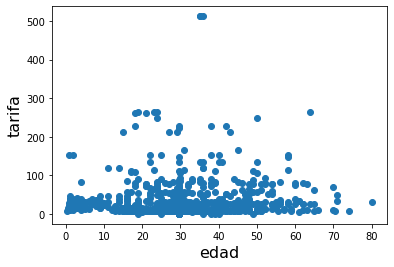

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_titanic['Age'],df_titanic['Fare'])

ax.set_xlabel('edad')
ax.set_ylabel('tarifa')
plt.show()

# ACTIVIDAD PARA LOS/LAS ESTUDIANTES

Utilicemos el Dataset de RRHH con datos de empleados: 

* descargar desde drive: https://drive.google.com/file/d/1pz1WgskPr5oX0OkboIN3SiLkqqZzSonP/view?usp=sharing

* [Fuente en Kaggle](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set)

**Primero importa el dataframe**

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/coderhouse/HRDataset_v14.csv',sep=',')

**Cuántas filas y columnas tiene nuestro dataframe?**

In [ ]:
data.shape #311 filas y 36 columnas

(311, 36)

**Qué tipo de datos tiene cada columna del dataset?**

In [ ]:
data.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

**Cuántos valores nulos tiene cada columna?**

In [ ]:
data.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

**De las columnas que nos dice que son numéricas, menciona al menos 4 que creas deben ser convertidas a categoricas y la razon**

In [ ]:
data.describe() #podemos usar .describe() para ver columnas interpretadas como numericas

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


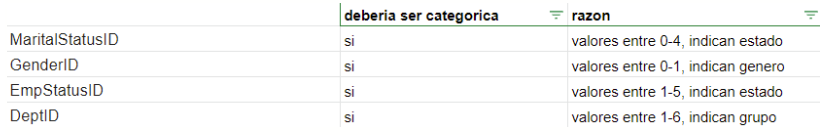

**Responde las siguientes preguntas usando gráficas....**

1. ¿Cuáles son las razones más frequentes para terminar el contrato de los empleados ? (Columna: TermReason) .... Observa los resultados y compara cierto valor con los valores nulos que existen en la columna DateofTermination, que notas? 
* Tip: puedes hacer un diagrama de barras, si necesitas que las etiquetas del eje x esten en posicion vertical para poder leerlas mejor utiliza ```plt.xticks(rotation='vertical')```

In [ ]:
data.groupby('TermReason').size()

TermReason
Another position                     20
Fatal attraction                      1
Learned that he is a gangster         1
N/A-StillEmployed                   207
attendance                            7
career change                         9
gross misconduct                      1
hours                                 8
maternity leave - did not return      3
medical issues                        3
military                              4
more money                           11
no-call, no-show                      4
performance                           4
relocation out of area                5
retiring                              4
return to school                      5
unhappy                              14
dtype: int64

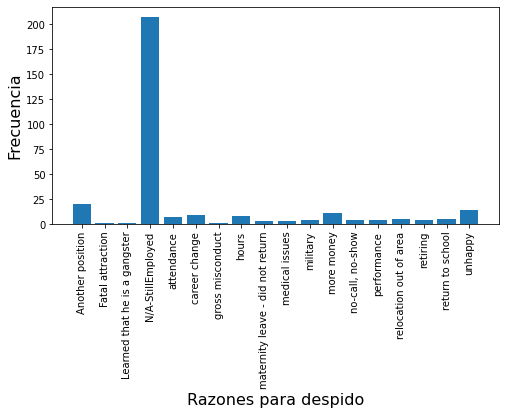

In [ ]:
razones= data.groupby('TermReason').size()
 
fig, ax = plt.subplots(figsize=(8,4)) # figsize: (ancho,alto) en pulgadas 
ax.bar(razones.index, razones.values)
 
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Razones para despido')
 
plt.xticks(rotation='vertical') #para que me muestre eje x mas claro
plt.show()

* Interpretando la grafica con logica, vemos que hay muchos empleados (207) que siguen con sus contratos de trabajo....pero entre los que se fueron del cargo, las razones mas frequentes son que la persona se movio a otro rol de trabajo o que era infeliz en el puesto.

* Los 207 empleados no despedidos no deben tener ningun valor asignado (porque siguen en la empresa) en la columna DateofTermination y por eso existe la misma cantidad de valores nulos (207) en dicha columna

2. ¿Consideras que esta empresa tiene bastante diversidad racial en los empleados? Columna: RaceDesc

* Tip: puedes hacer un diagrama de barras, si necesitas que las etiquetas del eje x esten en posicion vertical para poder leerlas mejor utiliza ```plt.xticks(rotation='vertical')```

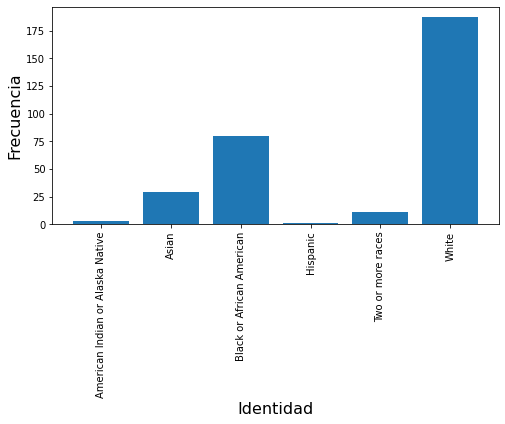

In [ ]:
identidad_racial= data.groupby('RaceDesc').size()
 
fig, ax = plt.subplots(figsize=(8,4)) # figsize: (ancho,alto) en pulgadas 
ax.bar(identidad_racial.index, identidad_racial.values)
 
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Identidad')
 
plt.xticks(rotation='vertical') #para que me muestre eje x mas claro
plt.show()

La mayoria de los empleados son caucasicos, tal vez podrian invertir mas en estrategias para contrataciones diversas

3. Crea un histograma de salarios (Columna:Salary) para genero masculino (GenderID=1) y otro para genero femenino (GenderID=0). Ves diferencias en términos generales?

* Tip: Si quieres ver diferencias puedes crear bins o rangos, como en este [ejemplo](https://colab.research.google.com/drive/1a29Q8FZZ3PCkoI0bgtee_H53tZqk4kcx#scrollTo=Wx9sStYQJghU&line=2&uniqifier=1) , puedes reemplazar la seccion de bins por una lista como ```bins=[40000,70000,100000,130000,160000,190000]```

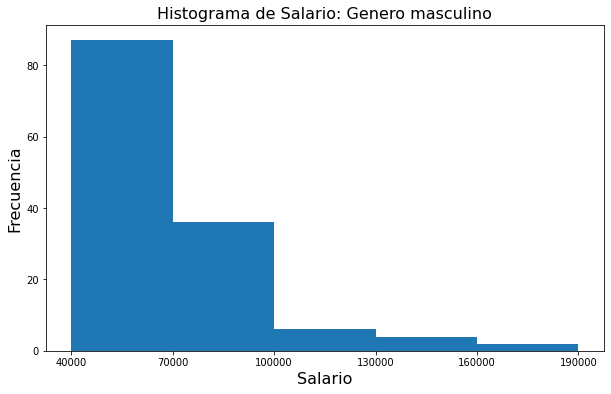

In [ ]:
masc=data.loc[data.GenderID==1,'Salary']
 
fig, ax = plt.subplots(figsize=(10,6))
n, bins, patches=ax.hist(x=masc.values, bins=[40000,70000,100000,130000,160000,190000]) #divido en 8 intervalos
ax.set_xlabel('Salario')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Salario: Genero masculino')
plt.xticks(bins)
plt.show()

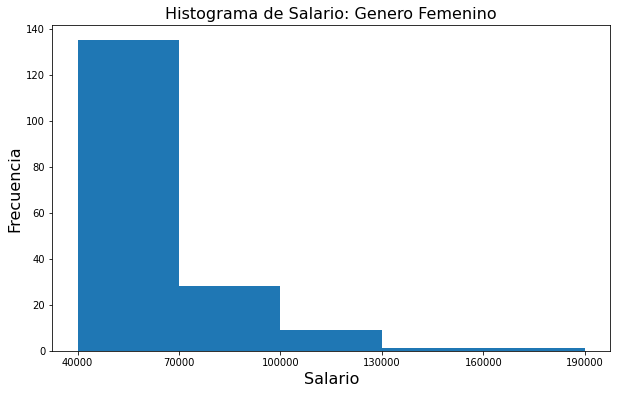

In [ ]:
feme=data.loc[data.GenderID==0,'Salary']
 
fig, ax = plt.subplots(figsize=(10,6))
n, bins, patches=ax.hist(x=feme.values, bins=[40000,70000,100000,130000,160000,190000])
ax.set_xlabel('Salario')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Salario: Genero Femenino')
plt.xticks(bins)
plt.show()

Existen diferencias en cantidades de hombres vs mujeres que estan tanto en los rangos mas bajos de salario como los mas altos.

4. Dirías que EN PROPORCIÓN la mayoria de empleados fueron encontrados en Ferias de Diversidad laboral? Columna: FromDiversityJobFairID

* 0: empleado no viene de dicha feria, 1:empleado fue conocido en dicha feria

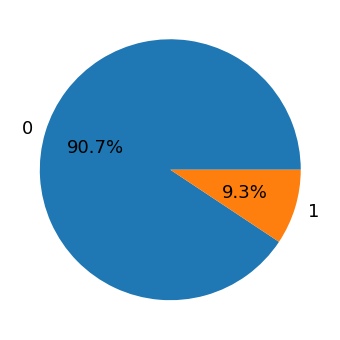

In [ ]:
 
f_diver=data.groupby('FromDiversityJobFairID').size()
 
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(f_diver.values, labels=f_diver.index,
       autopct='%1.1f%%',
       textprops={'fontsize': 18}) #el label es el nombre del departamento
 
plt.show()


Muy pocos empleados, solo el 9.3% fueron reclutados a traves de ferias de diversidad laboral

**Responde las siguientes preguntas sin gráficas...**

5. Qué podemos ver en los resumenes estadísticos para las columnas EngagementSurvey y EmpSatisfaction? 
Asumiendo que 1 es una mala calificación y 5 la mejor calificación...
* cuáles fueron los valores promedio de cada una? 
* Si observaramos sólamente la mediana, cuál métrica tuvo mejores resultados?

In [ ]:
data[['EngagementSurvey','EmpSatisfaction']].describe()

,EngagementSurvey,EmpSatisfaction
count,311.000000,311.000000
mean,4.110000,3.890675
std,0.789938,0.909241
min,1.120000,1.000000
25%,3.690000,3.000000
50%,4.280000,4.000000
75%,4.700000,5.000000
max,5.000000,5.000000


Los promedios los vemos en la fila 'mean' y si nos fijaramos solo en la mediana, los mejores resultados fueron de la EngagementSurvey (fila etiquetada como 50%)

6. ¿Cuáles áreas (columna: Department) tienen el mejor puntaje de desempeño promedio (PerfScoreID) ?


In [ ]:
data.groupby('Department')['PerfScoreID'].mean()

###las areas con mejores promedios en PerfScoreID son: Software Engineering y IT/IS

Department
Admin Offices           3.000000
Executive Office        3.000000
IT/IS                   3.060000
Production              2.971292
Sales                   2.838710
Software Engineering    3.090909
Name: PerfScoreID, dtype: float64

7. ¿Cuáles áreas (columna:Department) tienen los mejores salarios en promedio?


In [ ]:
data.groupby('Department')['Salary'].mean().sort_values(ascending=False) #sort_values(ascending=False), permite ordenar de mayor a menor los resultados


###las areas con mejores salarios en promedio son: Executive Office, IT/IS y Software Engineering

Department
Executive Office        250000.000000
IT/IS                    97064.640000
Software Engineering     94989.454545
Admin Offices            71791.888889
Sales                    69061.258065
Production               59953.545455
Name: Salary, dtype: float64

# Preguntas adicionales de la clase

**¿Cómo le agrego etiquetas de números a bar plot?**

Si quieres entender comando zip que se usa en siguiente celda mira: https://www.w3schools.com/python/ref_func_zip.asp o https://ellibrodepython.com/zip-python

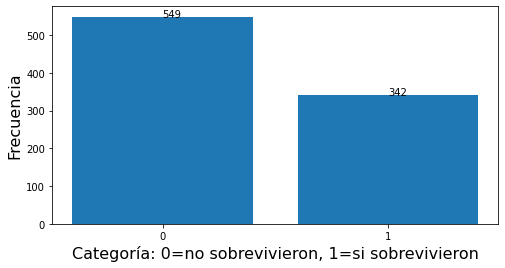

In [ ]:
fig, ax = plt.subplots(figsize=(8,4)) # figsize: (ancho,alto) en pulgadas 
ax.bar(sobrevivientes.index, sobrevivientes.values)

ax.set_ylabel('Frecuencia')
ax.set_xlabel('Categoría: 0=no sobrevivieron, 1=si sobrevivieron')

plt.xticks(np.arange(0, 2, step=1)) #para que me muestre eje x mas claro

#PARA AGREGAR ETIQUETA CON EL VALOR NUMERICO SOBRE LAS BARRAS:
for x, y in zip(sobrevivientes.index, sobrevivientes.values):
 plt.annotate(y, (x, y))

plt.show()

**¿Cómo le agrego etiquetas de números a diagrama de lineas (del ejemplo que vimos hoy que era mas avanzado)?**

Puedes:

1. Crear una funcion 
```
def funcion_agregar_etiquetas(valores_eje_x,valores_eje_y):
    for x, y in zip(valores_eje_x, valores_eje_y):
      plt.annotate(y, (x, y))
```
Como mencione antes, si quieres entender comando zip que se usa aqui mira: https://www.w3schools.com/python/ref_func_zip.asp o https://ellibrodepython.com/zip-python

2. Pasarle los valores de los ejes (x) y (y) para cada caso




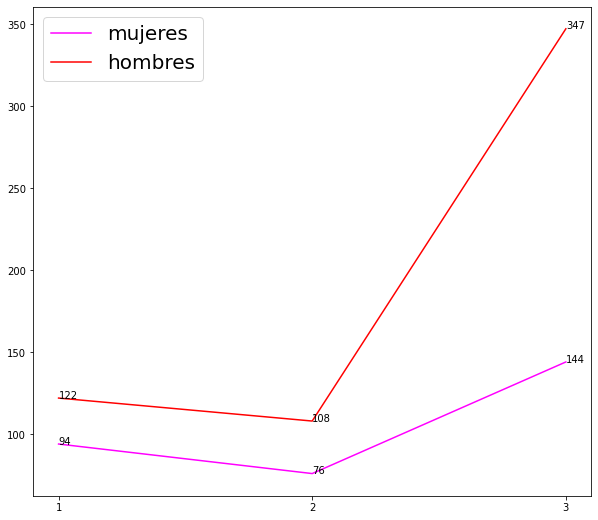

In [ ]:
fig, ax = plt.subplots(figsize=(10,9)) # figsize: (ancho,alto) en pulgadas 

ax.plot(clase_tiquete.loc[clase_tiquete['Sex']=='female','Pclass'], 
        clase_tiquete.loc[clase_tiquete['Sex']=='female','conteo'], 
        label='mujeres',color='magenta')

ax.plot(clase_tiquete.loc[clase_tiquete['Sex']=='male','Pclass'], 
        clase_tiquete.loc[clase_tiquete['Sex']=='male','conteo'], 
        label='hombres', color='red')

ax.legend() #mostrando mi cajita de etiquetas para cada linea
plt.xticks(np.arange(1, 4, step=1)) #para que me muestre eje x mas claro

#PARA AGREGAR ETIQUETA CON EL VALOR NUMERICO SOBRE CADA LINEA:
def funcion_agregar_etiquetas(valores_eje_x,valores_eje_y):
  for x, y in zip(valores_eje_x, valores_eje_y):
    plt.annotate(y, (x, y))

#enviar valores de linea mujeres
funcion_agregar_etiquetas(clase_tiquete.loc[clase_tiquete['Sex']=='female','Pclass'],
                          clase_tiquete.loc[clase_tiquete['Sex']=='female','conteo'])

#enviar valores de linea hombres
funcion_agregar_etiquetas(clase_tiquete.loc[clase_tiquete['Sex']=='male','Pclass'],
                          clase_tiquete.loc[clase_tiquete['Sex']=='male','conteo'])

plt.show()

**Conversion de datos de series de tiempo de un formato a otro**

Ejemplo: Cómo convierto formato de datos de dd/mm/yyyy a yyyy/mm?

[Material complementario](https://www.geeksforgeeks.org/python-strftime-function/)

In [ ]:
fecha_inicial = pd.to_datetime('03/01/2020',dayfirst=True) #la conversion a tipo datetime, desde un string con formato dd/mm/yyyy

print('tengo una fecha en tipo timestamp que es: ',fecha_inicial)

fecha_modificada = fecha_inicial.strftime('%m/%y') #aca le decimos que queremos el siguiente formato mm/yy

print()
print('luego la modifico a un formato diferente y queda:',fecha_modificada)

tengo una fecha en tipo timestamp que es:  2020-01-03 00:00:00

luego la modifico a un formato diferente y queda: 01/20
